In [1]:
import sys
import os

# Adjust this path to point to the directory containing `thesis`
project_root = "~"
sys.path.append(project_root)

os.environ["CUDA_VISIBLE_DEVICES"] = "3"

import torch
from thesis.data_handling import get_embedding_dataset
from thesis.models.EigenScore import getEigenIndicator_v0
from omegaconf import OmegaConf
from hydra import initialize, compose


# Initialize Hydra and load the config file
config_path = "./thesis/config"  # Directory of your YAML config file
config_name = "config"  # Name of your YAML file, without .yaml extension

initialize(config_path=config_path, job_name="notebook")  # Set up Hydra for the notebook
cfg = compose(config_name=config_name)


dataset = get_embedding_dataset(cfg)

/tmp/ipykernel_2698787/3228873010.py:21: UserWarning: 
The version_base parameter is not specified.
Please specify a compatability version level, or None.
Will assume defaults for version 1.1
  initialize(config_path=config_path, job_name="notebook")  # Set up Hydra for the notebook
/home/martin.preiss/MasterThesis/thesis/data_handling.py:9: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_g

In [2]:
#data = torch.stack([dataset[i][0] for i in range(len(dataset))])
labels =  torch.stack([dataset[i][1] for i in range(len(dataset))])

In [3]:
eigenscores = []

for data, label in dataset:
    try:
        eigenscores.append(getEigenIndicator_v0(data)[0])
    except:
        eigenscores.append(0)
        continue

In [4]:
import numpy as np 

eigenscores = np.stack(eigenscores)

In [5]:
labels = labels.numpy().squeeze()


In [6]:
hallucinated_scores = eigenscores[labels==1]
non_hallucinated_scores = eigenscores[labels==0]

In [7]:
print(np.mean(hallucinated_scores),np.mean(non_hallucinated_scores))

0.37868509176306864 0.3771485015809106


(array([[  1.,  11.,  64., 177., 311., 206.,  55.,  12.,   2.,   2.],
        [  2.,  38., 125., 324., 390., 222.,  49.,   8.,   2.,   1.]]),
 array([0.35743965, 0.36212766, 0.36681567, 0.37150368, 0.37619169,
        0.38087971, 0.38556772, 0.39025573, 0.39494374, 0.39963175,
        0.40431976]),
 <a list of 2 BarContainer objects>)

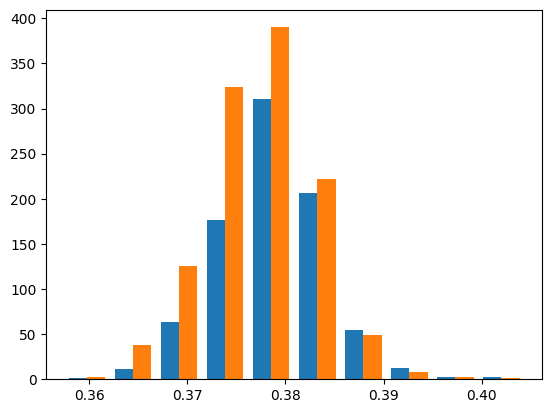

In [8]:
import matplotlib.pyplot as plt
plt.hist([hallucinated_scores,non_hallucinated_scores])